## Extract B$_{\rm crit}$ halfway throught the main sequence

In [52]:
import mesa_reader as mr
import numpy as np
from pylab import *
from math import log10, pi
import pickle
from matplotlib.colors import LinearSegmentedColormap
import constants
import functions
import plot_settings
import getters
from functions import *

# Figures Location
FIGURES='../figures/' # Place to save plots

# Extract the pickled data
prefix,DIR,mods,hs,pf = pickle.load(open('parsed.data','rb'))

# Initialize a dictionary to hold all the B values for different tau levels
B_values = {
    'tau3': {'zams': [], 'midms': [], 'tams': []},
    'tau10': {'zams': [], 'midms': [], 'tams': []},
    'tau100': {'zams': [], 'midms': [], 'tams': []},
    'tau1000': {'zams': [], 'midms': [], 'tams': []},
    'tau1d4': {'zams': [], 'midms': [], 'tams': []}
}

masses = []

for hh in hs:
    model = hh.model_number
    logl = hh.log_L
    logg = hh.log_g
    loglh = hh.log_LH
    center_h1 = hh.center_h1
    logt = hh.log_Teff

    # Find zams, tams, and midms based on the given conditions
    zams = find_zams(logl, loglh, model)
    tams = find_tams(center_h1, model)
    zams = find_h(0.001, center_h1, model)
    midms = find_h(center_h1[zams]/2.0, center_h1, model)
    
    # Append mass
    masses.append(hh.star_mass[0])

    # Iterate through each tau level and append the corresponding B values
    for tau_level, B_shutoff_attr in zip(B_values.keys(), ['B_shutoff_down_to_tau_3', 'B_shutoff_down_to_tau_10', 'B_shutoff_down_to_tau_100', 'B_shutoff_down_to_tau_1000', 'B_shutoff_down_to_tau_1d4']):
        B = getattr(hh, B_shutoff_attr)
        B_values[tau_level]['zams'].append(B[zams])
        B_values[tau_level]['midms'].append(B[midms])
        B_values[tau_level]['tams'].append(B[tams])

### Let's plot values in the relevant mass range and proceed with some fits

<Figure size 720x432 with 0 Axes>

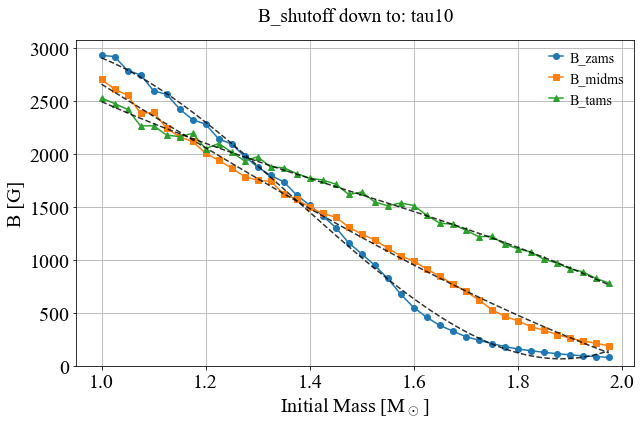

<Figure size 432x504 with 0 Axes>

In [50]:
def poly_to_latex(coeffs):
    terms = []
    degree = len(coeffs) - 1
    for power, coeff in enumerate(coeffs[::-1]):
        if coeff == 0:
            continue
        if power == 0:
            terms.append(f"{coeff:.2f}")
        elif power == 1:
            terms.append(f"{coeff:.2f} x")
        else:
            terms.append(f"{coeff:.2f} x^{power}")
    return " + ".join(terms)


# Choose the tau level you want to plot, e.g., tau3
tau_level = 'tau10'

masses = np.array(masses)
alpha = 0.8

# Polynomial fitting for the data
degree = 3 # Degree of the polynomial to fit (Linear works well for Midms and Tams. Midms requires a 3rd order polynomial fit)

# Fit a polynomial for each B stage
coeffs_zams = np.polyfit(masses, B_values[tau_level]['zams'], degree)
coeffs_midms = np.polyfit(masses, B_values[tau_level]['midms'], degree)
coeffs_tams = np.polyfit(masses, B_values[tau_level]['tams'], degree)

# Generate a range of mass values for plotting the fit curves
masses_fit = np.linspace(masses.min(), masses.max(), 100)

# Calculate the fitted B values using the polynomial coefficients
B_zams_fit = np.polyval(coeffs_zams, masses_fit)
B_midms_fit = np.polyval(coeffs_midms, masses_fit)
B_tams_fit = np.polyval(coeffs_tams, masses_fit)

B_zams_fit = np.clip(B_zams_fit, 0, None)  # Ensuring Y >= 0
B_midms_fit = np.clip(B_midms_fit, 0, None)  # Ensuring Y >= 0
B_tams_fit = np.clip(B_tams_fit, 0, None)  # Ensuring Y >= 0

zams_latex = poly_to_latex(coeffs_zams)
midms_latex = poly_to_latex(coeffs_midms)
tams_latex = poly_to_latex(coeffs_tams)

# Plotting the original data and the fit curves
plt.figure(figsize=(10, 6))


# Plotting mass vs B_zams, B_midms, B_tams for the chosen tau level
plt.figure(figsize=(10, 6))

plt.plot(masses, B_values[tau_level]['zams'], 'o-', label='B_zams')
plt.plot(masses, B_values[tau_level]['midms'], 's-', label='B_midms')
plt.plot(masses, B_values[tau_level]['tams'], '^-', label='B_tams')
plt.plot(masses_fit, B_zams_fit, '--',color='black',alpha=alpha)
plt.plot(masses_fit, B_midms_fit, '--',color='black',alpha=alpha)
plt.plot(masses_fit, B_tams_fit, '--',color='black',alpha=alpha)

## Uncomment the following lines to see the fit functions

#plt.plot(masses_fit, B_zams_fit, '--',color='black',alpha=alpha, label=f'Fit: $y = {zams_latex}$')
#plt.plot(masses_fit, B_midms_fit, '--',color='black',alpha=alpha, label=f'Fit: $y = {midms_latex}$')
#plt.plot(masses_fit, B_tams_fit, '--',color='black',alpha=alpha, label=f'Fit: $y = {tams_latex}$')

plt.ylim(bottom=0)
plt.xlabel(r'Initial Mass [M$_\odot$]')
plt.ylabel('B [G]')
plt.title('B_shutoff down to: '+tau_level)
plt.legend()
plt.grid(True)
plt.show()
name='B_shutoff_'+tau_level
plt.savefig(FIGURES+name+'.pdf',bbox_inches='tight')


### Let's expose the fitting functions

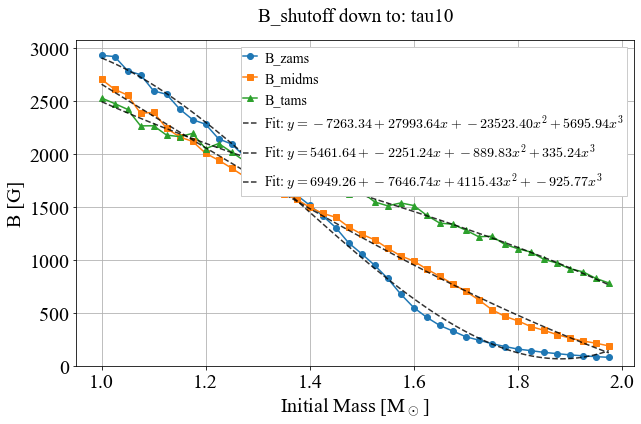

<Figure size 432x504 with 0 Axes>

In [51]:
plt.figure(figsize=(10, 6))

plt.plot(masses, B_values[tau_level]['zams'], 'o-', label='B_zams')
plt.plot(masses, B_values[tau_level]['midms'], 's-', label='B_midms')
plt.plot(masses, B_values[tau_level]['tams'], '^-', label='B_tams')


## Uncomment the following lines to see the fit functions

plt.plot(masses_fit, B_zams_fit, '--',color='black',alpha=alpha, label=f'Fit: $y = {zams_latex}$')
plt.plot(masses_fit, B_midms_fit, '--',color='black',alpha=alpha, label=f'Fit: $y = {midms_latex}$')
plt.plot(masses_fit, B_tams_fit, '--',color='black',alpha=alpha, label=f'Fit: $y = {tams_latex}$')


plt.ylim(bottom=0)
plt.xlabel(r'Initial Mass [M$_\odot$]')
plt.ylabel('B [G]')
plt.title('B_shutoff down to: '+tau_level)
legend = plt.legend(frameon = 1)
frame = legend.get_frame()
plt.grid(True)
plt.show()
name='B_shutoff_'+tau_level
plt.savefig(FIGURES+name+'_fit.pdf',bbox_inches='tight')

So for example for tau = 10 the linear fit for B_midms in the range 1- 2 Msun is: 

B/kG = 5.2 - 2.6 M

and the cubic fit is:

B/kG = 0.55 - 2.25 M - 0.89M$^2$ + 0.34 M$^3$
 

In [46]:
import pandas as pd
# Creating a DataFrame to print out as a table
df = pd.DataFrame({
    'Masses': masses,
    'B_values (tau10, midms)': B_values['tau10']['midms']
})

df

,Masses,"B_values (tau10, midms)"
0,1.000,2701.954090
1,1.025,2607.708333
2,1.050,2553.430134
3,1.075,2381.908457
4,1.100,2391.351883
5,1.125,2241.736231
6,1.150,2159.578462
7,1.175,2117.482456
8,1.200,2005.548476
9,1.225,1940.519152


### Let's look at the runs of B$_{\rm crit}$ as function of age at a fixed mass

In [47]:
prefix,DIR,mods,hs,pf = pickle.load(open('parsed.data','rb'))
hh=hs[20] # Change this number to select models of different masses. 0 is 1Msun, 20 is 1.5Msun, 39 is 2Msun  
hh.bulk_names
hh.file_name
print(r'Looking at a model with mass: '+str(hh.star_mass[0])+' M')

Looking at a model with mass: 1.5 M


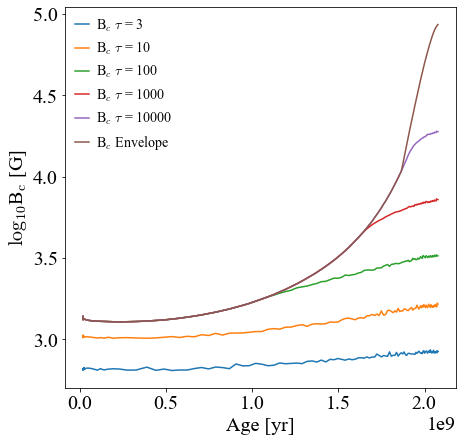

In [48]:
model = hh.model_number 
logl = hh.log_L
logg = hh.log_g 
loglh = hh.log_LH 
center_h1 = hh.center_h1 
logt= hh.log_Teff 
    
zams=find_zams(logl,loglh,model)
tams=find_tams(center_h1,model)
zams=find_h(0.001,center_h1,model)

A = hh.Envelope_B_shutoff
B = hh.HI_B_shutoff 
C = hh.HeI_B_shutoff
D = hh.HeII_B_shutoff
E = hh.FeCZ_B_shutoff

F = np.amax(np.stack((A, B, C, D, E)), axis=0) # Max value of B_crit for any CZ occurring in the star

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
    
ax.plot(hh.star_age[zams:tams],np.log10(hh.B_shutoff_down_to_tau_3[zams:tams]),label=r'B$_c$ $\tau$ = 3')
ax.plot(hh.star_age[zams:tams],np.log10(hh.B_shutoff_down_to_tau_10[zams:tams]),label=r'B$_c$ $\tau$ = 10')
ax.plot(hh.star_age[zams:tams],np.log10(hh.B_shutoff_down_to_tau_100[zams:tams]),label=r'B$_c$ $\tau$ = 100')
ax.plot(hh.star_age[zams:tams],np.log10(hh.B_shutoff_down_to_tau_1000[zams:tams]),label=r'B$_c$ $\tau$ = 1000')
ax.plot(hh.star_age[zams:tams],np.log10(hh.B_shutoff_down_to_tau_1d4[zams:tams]),label=r'B$_c$ $\tau$ = 10000')
#ax.plot(hh.star_age[zams:tams],np.log10(hh.Envelope_B_shutoff[zams:tams]))
#ax.plot(hh.star_age[zams:tams],np.log10(hh.HI_B_shutoff[zams:tams]))
ax.plot(hh.star_age[zams:tams],np.log10(F[zams:tams]),label=r'B$_c$ Envelope')
ax.legend()
ax.set_xlabel('Age [yr]')
ax.set_ylabel(r'$\log_{10}$B$_{\rm c}$ [G]')
name='Bcrits'
mass=str(hh.star_mass[0])
plt.savefig(FIGURES+name+'_'+mass+'.pdf',bbox_inches='tight')